# Exploratory Data Analysis on IMDB Movie Data

In [1]:
from user_defined_functions.eda_functions import *
from user_defined_functions.modeling_functions import *

# display plots in notebook
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
         'axes.labelsize': 14,
         'axes.titlesize': 20,
         'xtick.labelsize': 14,
         'ytick.labelsize': 14}
plt.rcParams.update(params)

/Users/jinxin/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


### 1. Train/Test Set Split

It's important to split the training and test set in the beginning. We want to simulate the situation where the test set is only used once for prediction. The exploratory data analysis will be performed only on the training set.

In [2]:
imdb = pd.read_csv('movie_metadata.csv.zip', compression='zip', delimiter=',')
data, target = imdb.drop('imdb_score', axis=1), imdb['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True), \
                                   y_train.reset_index(drop=True), y_test.reset_index(drop=True)

### 2. Data Overview

In this section, we will get a sense of the data by looking at its first few rows, dimension, and column names.

**Summary:** The training set has 4043 samples and 27 features. The response variable is **imdb_score** and there are two types of features:
1. Numerical features (int type and float type) such as **movie_facebook_likes**, **budget**, and **duration**
2. Categorical features such as **director name**, **country**, and **language**

The number of samples in most columns is not 4043, meaning that there are missing values. So in next section let's look at summary statistics of the data.

In [3]:
X_train.shape # dimension of data

(4034, 27)

In [4]:
X_train.head() # first 5 rows of data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,Color,Albert Hughes,325.0,118.0,117.0,10000.0,Mila Kunis,18000.0,94822707.0,Action|Adventure|Drama|Thriller,...,http://www.imdb.com/title/tt1037705/?ref_=fn_t...,560.0,English,USA,R,80000000.0,2010.0,15000.0,2.35,20000
1,Color,David Wain,65.0,96.0,136.0,139.0,Ken Marino,4000.0,766487.0,Comedy|Romance,...,http://www.imdb.com/title/tt0811106/?ref_=fn_t...,117.0,English,USA,R,5250000.0,2007.0,543.0,1.85,915
2,Color,Roger Michell,212.0,107.0,50.0,58.0,Patti D'Arbanville,293.0,30993544.0,Comedy|Drama|Romance,...,http://www.imdb.com/title/tt1126618/?ref_=fn_t...,156.0,English,USA,PG-13,40000000.0,2010.0,117.0,2.35,0
3,Color,Paul Verhoeven,231.0,145.0,719.0,104.0,Sebastian Koch,2000.0,4398392.0,Drama|Thriller|War,...,http://www.imdb.com/title/tt0389557/?ref_=fn_t...,232.0,Dutch,Netherlands,R,21000000.0,2006.0,380.0,2.35,0
4,Color,Cameron Crowe,153.0,141.0,488.0,509.0,Ivana Milicevic,10000.0,100614858.0,Fantasy|Mystery|Romance|Sci-Fi|Thriller,...,http://www.imdb.com/title/tt0259711/?ref_=fn_t...,1248.0,English,USA,R,68000000.0,2001.0,834.0,1.85,0


In [5]:
X_train.info() # columns name and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 27 columns):
color                        4018 non-null object
director_name                3952 non-null object
num_critic_for_reviews       3993 non-null float64
duration                     4023 non-null float64
director_facebook_likes      3952 non-null float64
actor_3_facebook_likes       4017 non-null float64
actor_2_name                 4022 non-null object
actor_1_facebook_likes       4027 non-null float64
gross                        3341 non-null float64
genres                       4034 non-null object
actor_1_name                 4027 non-null object
movie_title                  4034 non-null object
num_voted_users              4034 non-null int64
cast_total_facebook_likes    4034 non-null int64
actor_3_name                 4017 non-null object
facenumber_in_poster         4027 non-null float64
plot_keywords                3916 non-null object
movie_imdb_link              4034 non-

From the plot below, we can see there is more numerical feature (float64 and int64) then categorical varialbes (object).

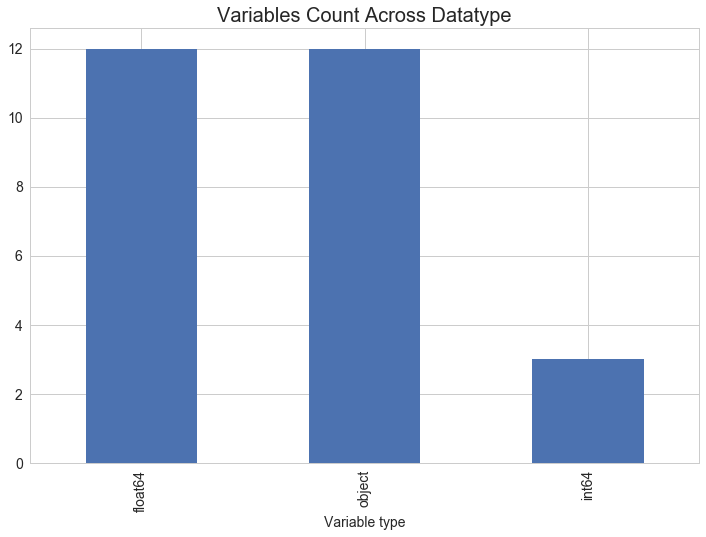

In [6]:
plot_dtype_distribution(X_train)

### 3. Summary Statistics
In this section, we dive a little deeper into the data by looking at its summary statistics.

**Summary:** From the table below we have the following findings:
1. The maximum movie duration is 511 minutes which is quite unusual
2. The largest movie budge is 12.2 billion, also unusual
3. The aspect ratio is usually 1.78 (16:9) or 1.33 (4:3), however the maximum aspect ratio is 16 which can be erroneous

In [7]:
X_train.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
count,3993.000000,4023.000000,3952.000000,4017.000000,4027.000000,3.341000e+03,4.034000e+03,4034.000000,4027.000000,4019.000000,3.640000e+03,3949.000000,4022.000000,3777.000000,4034.000000
mean,140.333584,107.140691,663.606781,630.390092,6585.846536,4.744504e+07,8.278328e+04,9653.758304,1.381177,272.060960,3.690133e+07,2002.480122,1617.701392,2.211893,7268.631135
std,120.098884,25.151705,2758.677235,1605.582833,15806.978323,6.562961e+07,1.337483e+05,18744.427240,2.033127,375.917478,1.071995e+08,12.373204,4067.903258,1.327882,18074.336703
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.180000,0.000000
25%,51.000000,93.000000,7.000000,135.000000,625.000000,5.283379e+06,8.897250e+03,1440.000000,0.000000,66.000000,6.000000e+06,1999.000000,282.500000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,376.000000,992.000000,2.511750e+07,3.446000e+04,3137.500000,1.000000,157.000000,1.920044e+07,2005.000000,596.500000,2.350000,160.000000
75%,196.000000,118.000000,204.000000,628.000000,11000.000000,6.065550e+07,9.775550e+04,13759.500000,2.000000,323.000000,4.200000e+07,2011.000000,912.000000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.676169e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,16.000000,197000.000000


Now let's take a look at the movie **duration** and **budget**.

When further looking into the movie "Trapped", it turns out that it's a TV series and in Finland they put several episodes together into a movie. The same goes for "Carlos". After checking a few other movies on IMDB, I confirm that there is no erroneous values in **duration**.

In [8]:
movie_info_explore(X_train, 'duration', top_n=10)

,movie_title,duration
2419,Trapped,511.0
2614,Carlos,334.0
1705,The Legend of Suriyothai,300.0
1129,Das Boot,293.0
3577,Apocalypse Now,289.0
505,The Company,286.0
1241,Gods and Generals,280.0
2399,Gettysburg,271.0
844,Arn: The Knight Templar,270.0
3286,Cleopatra,251.0


Regarding **budget**, it turns out that "Lady Vengeance" is a korean movie and its budget is in South Korean Won. The same goes for a few other movies from France, India, and China. So no erroneous values here. Since there is too many of them in our dataset, we can replace these values with the average budget of all movies. This kind of imputation usually works well.

In [9]:
movie_info_explore(X_train, 'budget', top_n=10)

,movie_title,budget
98,Lady Vengeance,4.200000e+09
4005,Fateless,2.500000e+09
645,Princess Mononoke,2.400000e+09
2143,Steamboy,2.127520e+09
572,Godzilla 2000,1.000000e+09
976,Kabhi Alvida Naa Kehna,7.000000e+08
3573,Tango,7.000000e+08
249,Red Cliff,5.536320e+08
1705,The Legend of Suriyothai,4.000000e+08
3961,The Messenger: The Story of Joan of Arc,3.900000e+08


The **aspect_ratio** indeed has some erroneous values such as 16 and 4. I assume that values are supposed to be 16:9 and 4:3. So if this feature is a good predictor we will need to fix the error.

In [10]:
X_train['aspect_ratio'].value_counts()

2.35     1911
1.85     1514
1.78       93
1.37       79
1.33       52
1.66       47
16.00      33
2.39       13
2.20       11
4.00        5
2.00        4
2.76        3
2.40        2
1.75        2
2.24        1
2.55        1
1.18        1
1.44        1
1.20        1
1.77        1
1.50        1
1.89        1
Name: aspect_ratio, dtype: int64

### 4. Missing Value Diagnosis

In this section, let's get some insights on missing values in each column.

From the table and plot below we can see that **gross** and **budget** have a higher count and percentage of missing values then other features. Later on, we need to impute missing values.

In [11]:
get_missing_info(X_train)

,Feature Name,Count,Percentage
8,gross,693,17.178979
22,budget,394,9.766981
25,aspect_ratio,257,6.370848
21,content_rating,237,5.875062
16,plot_keywords,118,2.925136
23,title_year,85,2.107090
4,director_facebook_likes,82,2.032722
1,director_name,82,2.032722
2,num_critic_for_reviews,41,1.016361
5,actor_3_facebook_likes,17,0.421418


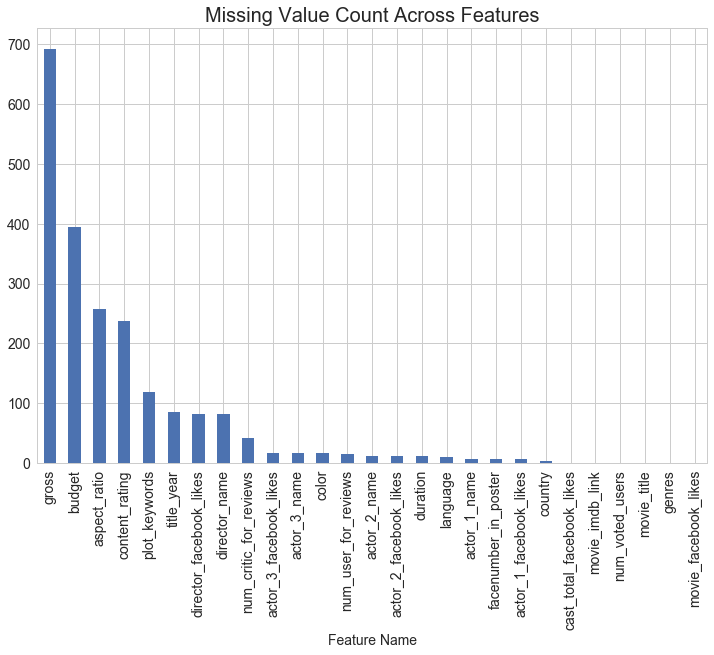

In [12]:
get_missing_info(X_train).plot(kind='bar', x='Feature Name', y='Count',
                          legend=None, title='Missing Value Count Across Features')

### 5. Correlation Exploration

So far we have not checked how each feature is related to the response variable **imdb_score**. In this section, let's use correlation coefficient and correlation plot to get a sense of which features may be good predictors.

#### 5.1 Numerical Features

**Summary: ** 
1. When looking at the correlation we notice that most features are postively correlated with **imdb_score** except **facenumber_in_poster** and **title_year** which are negatively correlated with **imdb_score**
2. We notice that **num_voted_user**, **num_critic_for_reviews**, and **num_user_for_reviews** are most correlated with **imdb_score** as compared to other features

In [13]:
data_with_y = pd.concat([y_train, X_train], axis=1)
corr_matrix = data_with_y.corr()
corr_matrix['imdb_score'].sort_values(ascending=False)

imdb_score                   1.000000
num_voted_users              0.413193
num_critic_for_reviews       0.306509
num_user_for_reviews         0.287095
duration                     0.261398
movie_facebook_likes         0.250373
gross                        0.194405
director_facebook_likes      0.170634
cast_total_facebook_likes    0.074107
actor_1_facebook_likes       0.068349
actor_2_facebook_likes       0.067940
aspect_ratio                 0.052711
actor_3_facebook_likes       0.042549
budget                       0.042236
facenumber_in_poster        -0.064741
title_year                  -0.209739
Name: imdb_score, dtype: float64

We are also curious if features are correlated with each other. By looking at the **correlation matrix heatmap** we have a few interesting findings:
1. **cast_total_facebook_likes** is highly correlated with **actor_1_facebook_likes** and **actor_2_facebook_likes**. The correlation is 0.94 and 0.71 respectively. This makes sense because **actor_facebook_likes** is a major component of **cast_total_facebook_likes**.
2. **num_user_for_reviews** and **num_voted_users** are highly correlated. The correlation is 0.8. One would expect that a popular movie has a lot of user votes and user reviews.

When features are correlated with each other, we say there exist multicolinearity. So now the question is should we deal with it? The answer is it depends. Generally speaking, multicolinearity doesn't harm a model's predictive power but will impact statistical inference (for example, if we want to see whether **num_votes_users** has a statistically significant impact on **imdb_score**). Therefore, I made the judgement call to include all numerical features.

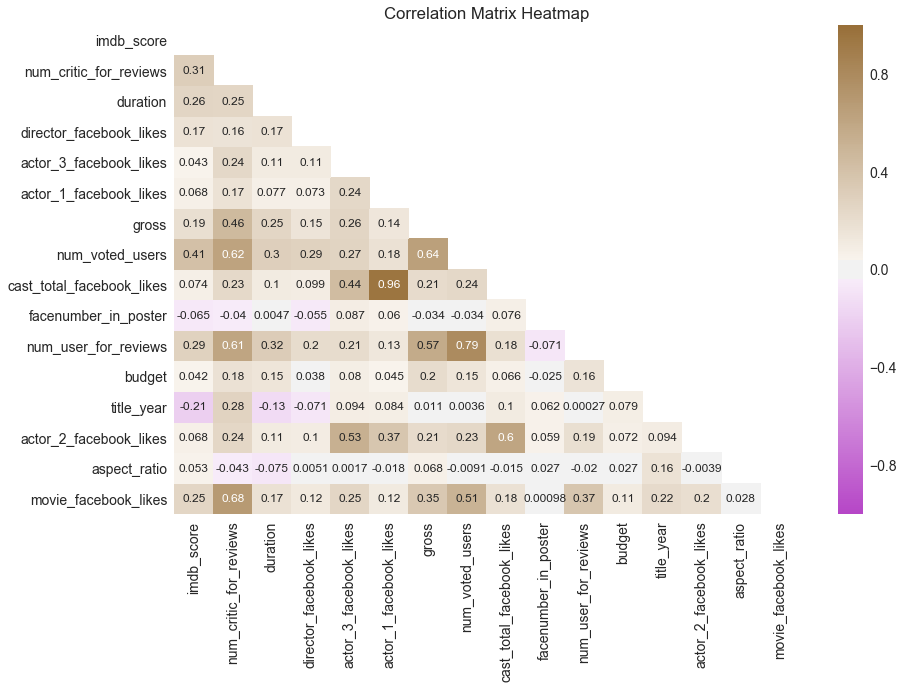

In [14]:
corr_mat_heatmap(data_with_y)

To get a even better sense about the correlation between **imdb_score** and numerial features, let's plot a correlation scatter plot.

**Summary: ** 
1. From the first row of the plot, we can see **imdb_score** is indeed correlated with the rest features. For example, as **num_voted_user** goes up, **imdb_score** also goes up. However, it should be noted correlation doesn't mean causation. **num_voted_user** is positively correlated with **imdb_score**, but we can't say the increase of **num_voted_users** cause **imdb_score** to go up
2. From the rest subplots we can see the features are also somewhat correlated with each other as we discussed earlier
3. The diagonal is the histogram of each feature

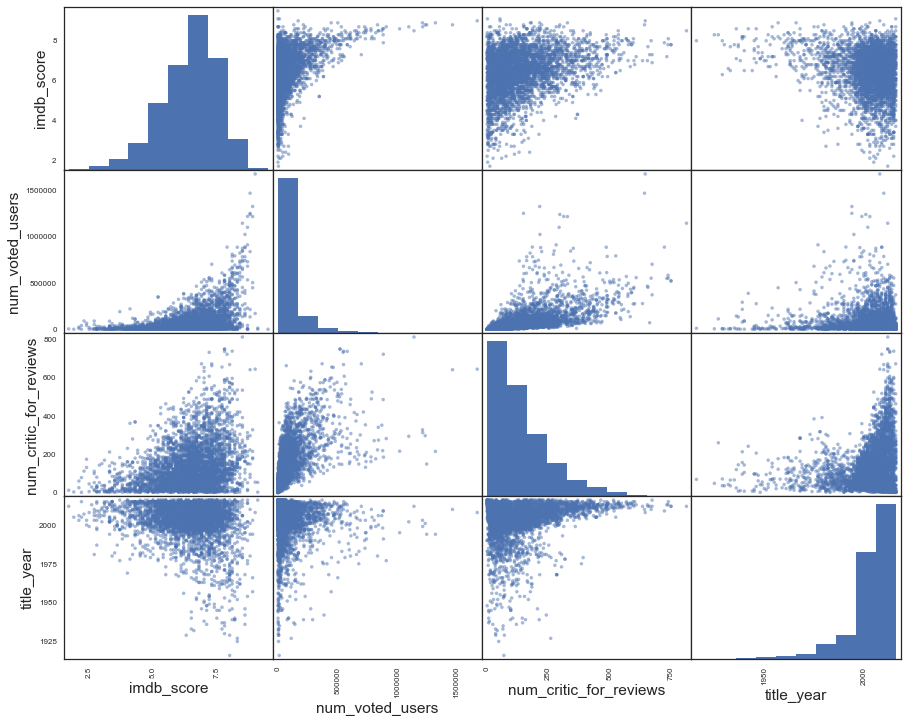

In [15]:
attributes = ['imdb_score', 'num_voted_users', 'num_critic_for_reviews', 'title_year']

scatter_matrix(data_with_y[attributes], figsize=(15, 12));

#### 5.2 Categorical Features

Now let's turn our focus to categorical features. In order to make sense of the relationship between a continuous variable (**imdb score**) and a categorical feature (e.g. **director name**), boxplot is very helpful. We can look at the distribution, median, maximum, and minimum of imdb ratings grouped by attributes (e.g. various director names). If these statistics are different, then **director_name** could be a good predictor. The same logic applys to other categorical features and we will look at some of them.

Also, it's helpful to look at the plot of mean grouped by attributes of a categorical features (e.g. mean rating by director name). If the mean is very different from each director, then **director name** might be a good feature.

**Summary: **
After the initial check, I first eliminated the following features:
1. **color**: there are 3844 color movies and only 175 black and white movies in the dataset. There is a very low variance in this feature meaning that it's not going to be useful.
2. **language** and **country**: there are over 3000 USA and 300 UK movies, meaning these two feature also have low variance.
3. **movie_imdb_link**, **movie_title**, and **plot_keywords**: these three features are unique to each movie and therefore won't make out model generalize well

Therefore, we can focus on features such as **director_name**, **genres**, and **actor_1_name**.

In [16]:
# first, let's take out categorical columns
cat_index = list(np.where(X_train.dtypes == 'O')[0])
cat_data = X_train.iloc[:, cat_index]
cat_with_response = pd.concat([y_train, cat_data], axis=1)
cat_with_response.columns.tolist()

['imdb_score',
 'color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

First, let's look at **director_name**. From the frequency table below, we can see each actor has more than 10 movies in our dataset. Also, the boxplot shows the rating varies across directors. Therefore the **average rating of director** may be a good feature.

In [17]:
top_frequent_value(cat_with_response, 'director_name')

,director_name,count
0,Steven Spielberg,20
1,Clint Eastwood,18
2,Woody Allen,16
3,Martin Scorsese,14
4,Renny Harlin,13
5,Ridley Scott,13
6,Sam Raimi,13
7,Michael Bay,12
8,Barry Levinson,12
9,Spike Lee,12


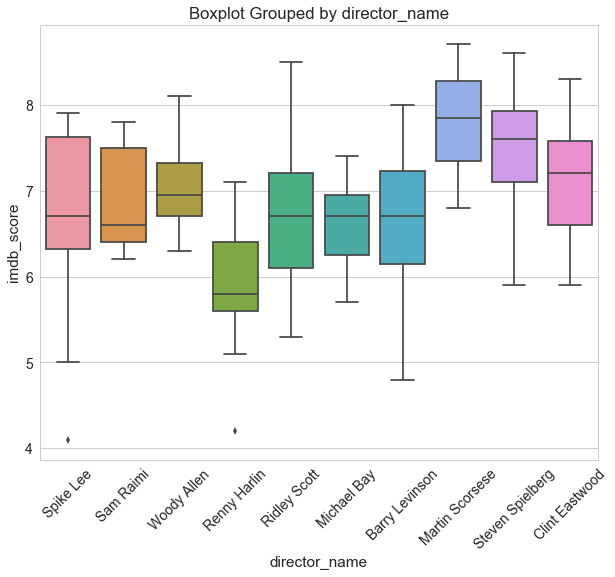

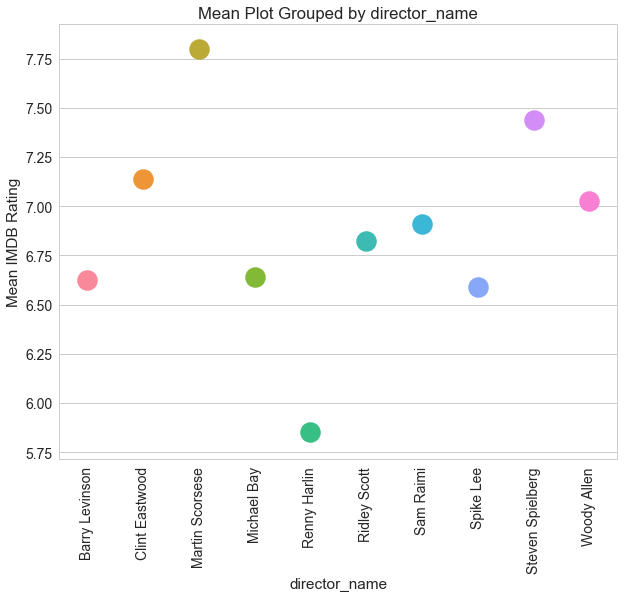

In [18]:
top_director_df = subset_by_freq_value(cat_with_response, 'director_name')
cat_boxplot(top_director_df, 'director_name')
cat_meanplot(top_director_df, 'director_name')

Next, let's look at **content_rating**. The most frequent values are "R", "PG-13", and "PG" and "TV-MA" has the highest average rating in the mean plot but there is only 16 movies of this category. We can include this feature in our model later on and see if it's predictive by looking at the **feature importance**.

In [19]:
top_frequent_value(cat_with_response, 'content_rating')

,content_rating,count
0,R,1721
1,PG-13,1167
2,PG,558
3,Not Rated,87
4,G,82
5,Unrated,52
6,Approved,42
7,TV-14,24
8,TV-MA,15
9,TV-PG,11


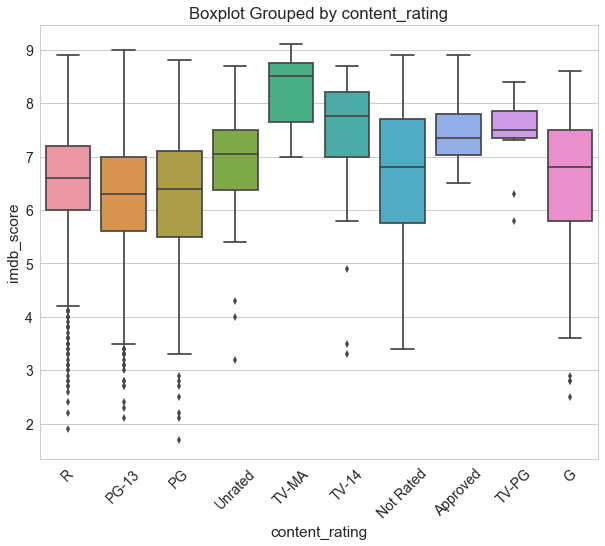

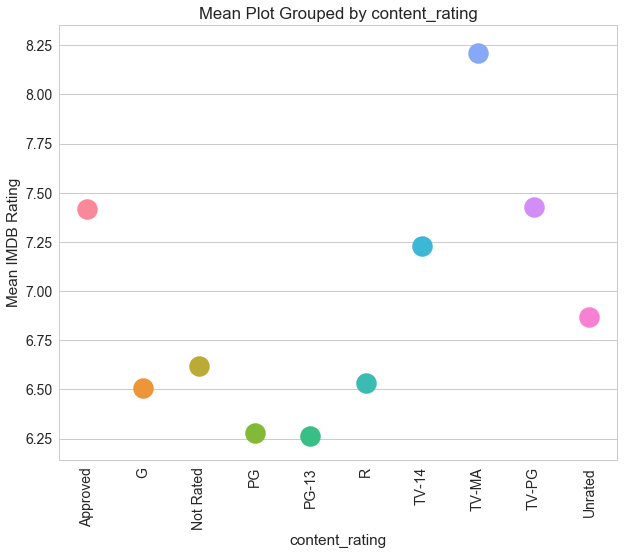

In [20]:
top_content_df = subset_by_freq_value(cat_with_response, 'content_rating')
cat_boxplot(top_content_df, 'content_rating')
cat_meanplot(top_content_df, 'content_rating')

Last but not least, let's look at **actor_1_name**. The average rating ranges from about 6.2 (poor Nicolas Cage) to 7.2 (Danzel Washington). **average rating of actor 1** could be a good feature.

In [21]:
top_frequent_value(cat_with_response, 'actor_1_name')

,actor_1_name,count
0,Robert De Niro,39
1,Johnny Depp,31
2,Nicolas Cage,26
3,J.K. Simmons,26
4,Bill Murray,24
5,Matt Damon,24
6,Steve Buscemi,23
7,Liam Neeson,22
8,Harrison Ford,22
9,Bruce Willis,22


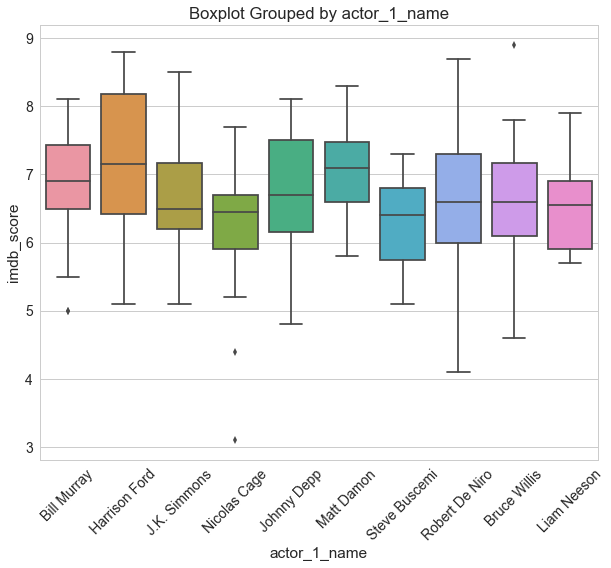

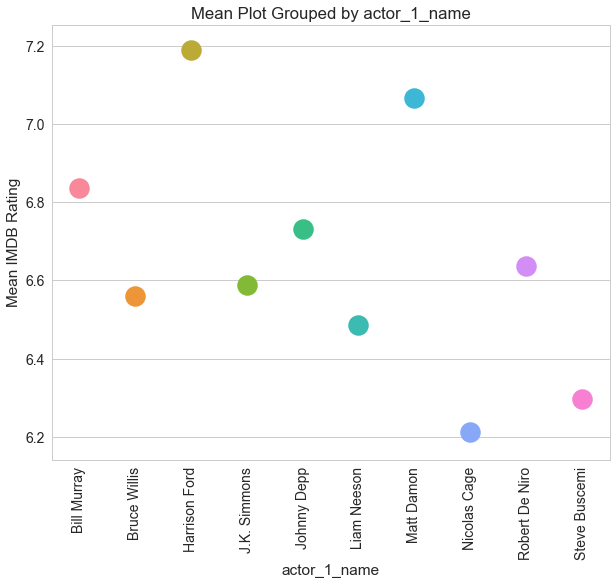

In [22]:
top_actor1_df = subset_by_freq_value(cat_with_response, 'actor_1_name')
cat_boxplot(top_actor1_df, 'actor_1_name')
cat_meanplot(top_actor1_df, 'actor_1_name')